In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [ ]:


# Directory containing your HDF5 files
dir_path = './in/data/lf/v1.0/'

signal_counts = []
background_counts = []
signal_ratios = []

# Loop over HDF5 files
for filename in os.listdir(dir_path):
    if filename.endswith('.h5'):
        file_path = os.path.join(dir_path, filename)
        with h5py.File(file_path, 'r') as hdf:
            target = hdf['target'][:]
            signals = np.sum(target == 1)
            backgrounds = np.sum(target != 1)

            signal_counts.append(signals)
            background_counts.append(backgrounds)
            signal_ratios.append(signals / len(target))

# Total counts
total_signals = np.sum(signal_counts)
print(total_signals.shape, total_signals)
total_backgrounds = np.sum(background_counts)
print(total_backgrounds.shape, total_backgrounds)
print(total_backgrounds+total_signals)




./in/data/hf/v1.0/COMPAS_1000_0_resum.h5
./in/data/hf/v1.0/COMPAS_1000_0_resum.h5 (1000000,)
./in/data/hf/v1.0/COMPAS_1000_1_resum.h5
./in/data/hf/v1.0/COMPAS_1000_1_resum.h5 (1000000,)
./in/data/hf/v1.0/COMPAS_1000_2_resum.h5
./in/data/hf/v1.0/COMPAS_1000_2_resum.h5 (1000000,)
./in/data/hf/v1.0/COMPAS_1000_3_resum.h5
./in/data/hf/v1.0/COMPAS_1000_3_resum.h5 (1000000,)
() 1504270
() 2495730
4000000


In [17]:

print(total_signals.shape, total_signals)
print(total_backgrounds.shape, total_backgrounds)
print(total_backgrounds+total_signals)

() 1504270
() 2495730
4000000


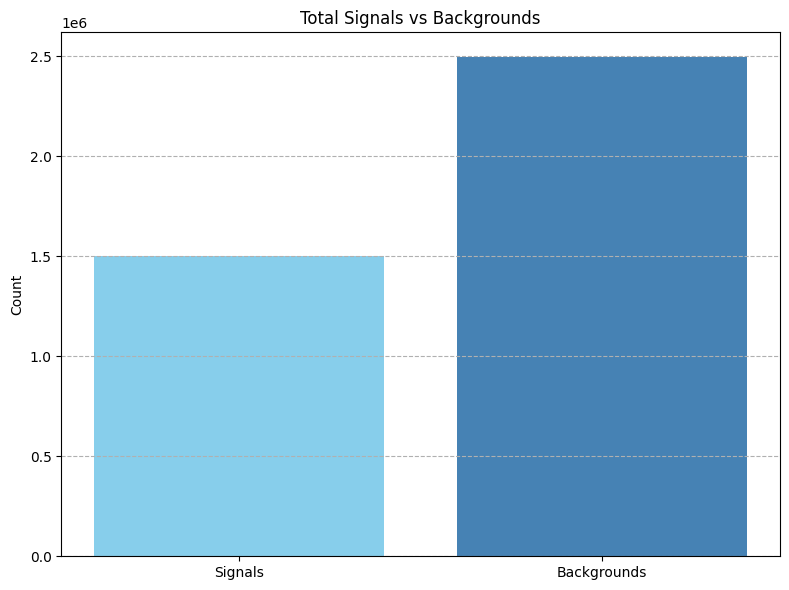

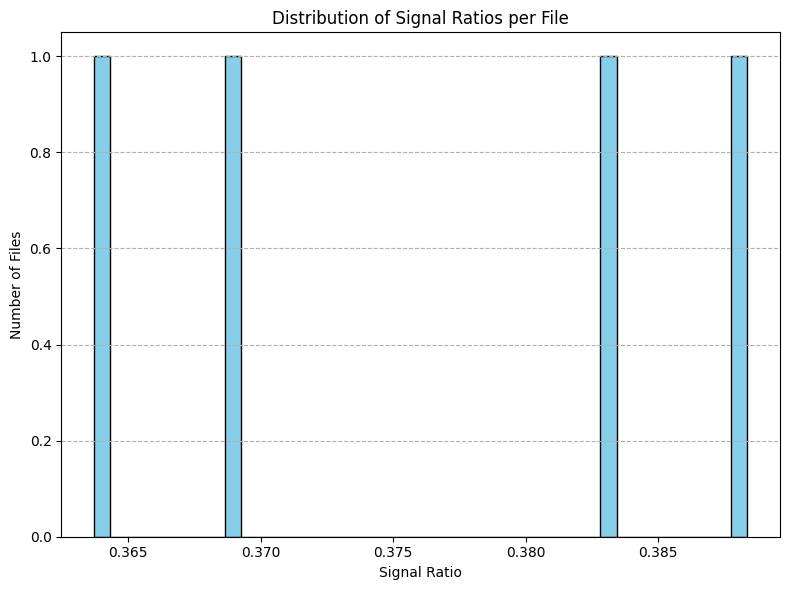

In [18]:
# Bar plot for total signals vs backgrounds
plt.figure(figsize=(8, 6))
plt.bar(['Signals', 'Backgrounds'], [total_signals, total_backgrounds], color=['skyblue', 'steelblue'])
plt.title('Total Signals vs Backgrounds')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Distribution of signal ratios per file
plt.figure(figsize=(8, 6))
plt.hist(signal_ratios, bins=40, color='skyblue', edgecolor='black')
plt.title('Distribution of Signal Ratios per File')
plt.xlabel('Signal Ratio')
plt.ylabel('Number of Files')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()